In [1]:
#Importing all the required libraries

import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
df=pd.read_csv(r'/content/gdrive/MyDrive/Analytics Vidhya/Image Classification/Dataset_Emergency_Vehicle/emergency_classification.csv')

In [4]:
df.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [5]:
from tqdm import tqdm
X=[]

for img in tqdm(df['image_names'].values):
  i=plt.imread(r'/content/gdrive/MyDrive/Analytics Vidhya/Image Classification/Dataset_Emergency_Vehicle/images/'+img)
  X.append(i)

100%|██████████| 2352/2352 [14:17<00:00,  2.74it/s]


In [6]:
X=np.array(X)

In [7]:
#Scaling
X=X/X.max()

In [8]:
X.shape

(2352, 224, 224, 3)

In [9]:
y=np.array(df.emergency_or_not.values)

In [10]:
y.shape

(2352,)

In [11]:
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.30,random_state=81)

In [12]:
y_train.shape

(1646,)

In [13]:
X_train.shape

(1646, 224, 224, 3)

## Model architecture

In [20]:
model=Sequential()
model.add(InputLayer(input_shape=(224,224,3)))
model.add(Conv2D(50,(5,5),activation='relu',strides=(1,1),padding='valid'))
model.add(MaxPool2D(pool_size=(2,2),padding='valid'))
model.add(Conv2D(50,(5,5), activation='relu',padding='valid',strides=(1,1)))
model.add(MaxPool2D(pool_size=(4,4),padding='valid'))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(100,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 220, 220, 50)      3800      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 50)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 50)      62550     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 26, 26, 50)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 33800)             0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [22]:
adam=Adam(lr=1e-5)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model Compiling

In [23]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model Checkpointing

In [24]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
filepath='best.hdf5'
early=EarlyStopping(monitor='val_accuracy',min_delta=0.01,patience=10,mode='max')
ck=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
cb_list=[ck,early]

In [18]:
y_train.shape

(1646,)

In [25]:
X_train.shape

(1646, 224, 224, 3)

In [26]:
model_history=model.fit(np.array(X_train),np.array(y_train),verbose=0, epochs=75, batch_size=128, validation_data=(X_val,y_val),callbacks=cb_list)


Epoch 00001: val_accuracy improved from -inf to 0.59915, saving model to best.hdf5

Epoch 00002: val_accuracy improved from 0.59915 to 0.64873, saving model to best.hdf5

Epoch 00003: val_accuracy improved from 0.64873 to 0.78329, saving model to best.hdf5

Epoch 00004: val_accuracy did not improve from 0.78329

Epoch 00005: val_accuracy did not improve from 0.78329

Epoch 00006: val_accuracy did not improve from 0.78329

Epoch 00007: val_accuracy did not improve from 0.78329

Epoch 00008: val_accuracy improved from 0.78329 to 0.79745, saving model to best.hdf5

Epoch 00009: val_accuracy did not improve from 0.79745

Epoch 00010: val_accuracy did not improve from 0.79745

Epoch 00011: val_accuracy improved from 0.79745 to 0.82011, saving model to best.hdf5

Epoch 00012: val_accuracy did not improve from 0.82011

Epoch 00013: val_accuracy did not improve from 0.82011

Epoch 00014: val_accuracy did not improve from 0.82011

Epoch 00015: val_accuracy did not improve from 0.82011

Epoch 0

In [33]:
#Loading best model
from sklearn.metrics import accuracy_score
print("Accuracy=", accuracy_score(y_val, (model.predict(X_val) > 0.5).astype("int32")),"%")

Accuracy= 0.8555240793201133 %


Plotting Loss

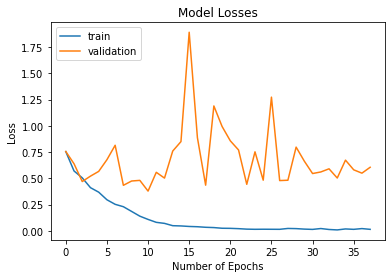

In [35]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title("Model Losses")
plt.ylabel('Loss')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')

Plotting Accuracy

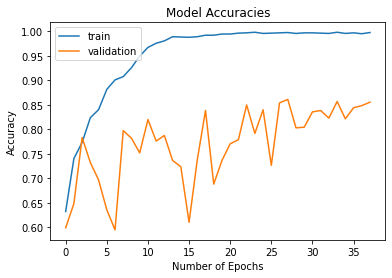

In [36]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("Model Accuracies")
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(['train','validation'],loc='upper left')